In [1]:
import pandas as pd

dataset = pd.read_csv('Social Network ADS.csv', delimiter=',')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


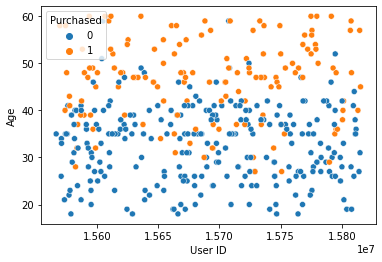

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

 
sns.scatterplot(x='User ID',y='Age', data=dataset,
            hue='Purchased')
 
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
X = dataset.drop(columns='Purchased')
y = dataset.Purchased

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 4), (320, 4), (80,), (320,))

In [4]:
from sklearn.compose import ColumnTransformer
from jcopml.pipeline import num_pipe, cat_pipe
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['User ID', 'Age', 'EstimatedSalary']),
    ('categoric', cat_pipe(encoder = 'onehot'), []),
])

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', GaussianNB()),
])

In [6]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['User ID', 'Age',
                                                   'EstimatedSalary']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('algo', GaussianNB())])

In [7]:
pipeline.score(X_train, y_train)

0.975

In [8]:
pipeline.score(X_test, y_test)

0.86875

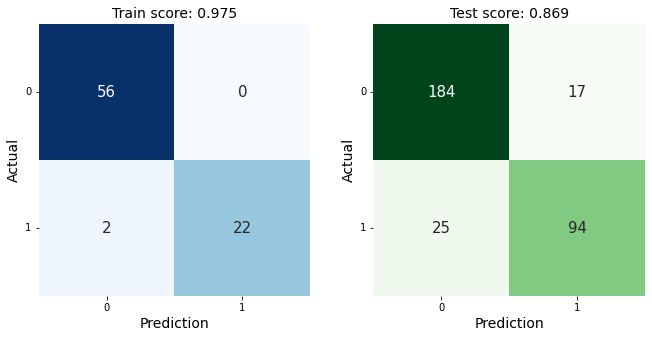

In [9]:
from jcopml.plot import plot_confusion_matrix
plot_confusion_matrix(X_train, y_train, X_test, y_test, pipeline)